# Data Exploration

Reference: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../inputs/train.csv')

In [3]:
df_train.columns

Index(['Reg. Date', 'Property Name', 'Street', 'Block', 'Floor', 'Flat',
       'Price$(M)', 'Build Size(feet)', 'Actual Size(feet)', 'Price/sq.ft',
       'Building age(year)', 'Type'],
      dtype='object')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reg. Date           5952 non-null   object 
 1   Property Name       5318 non-null   object 
 2   Street              5952 non-null   object 
 3   Block               2732 non-null   object 
 4   Floor               5918 non-null   object 
 5   Flat                5343 non-null   object 
 6   Price$(M)           5952 non-null   float64
 7   Build Size(feet)    559 non-null    object 
 8   Actual Size(feet)   1589 non-null   object 
 9   Price/sq.ft         559 non-null    float64
 10  Building age(year)  2063 non-null   float64
 11  Type                5952 non-null   object 
dtypes: float64(3), object(9)
memory usage: 558.1+ KB


In [52]:
df_train['Build Size(feet)'] = df_train['Build Size(feet)'].apply(pd.to_numeric, errors='coerce')
df_train['Actual Size(feet)'] = df_train['Actual Size(feet)'].apply(pd.to_numeric,errors='coerce')
df_train['Price/sq.ft'] = df_train['Price/sq.ft'].apply(pd.to_numeric,errors='coerce')

In [47]:
df_train['Floor'] = df_train['Floor'].apply(pd.to_numeric,errors='coerce')
df_train['Building age(year)'] = df_train['Building age(year)'].apply(pd.to_numeric,errors='coerce')

## Target Variable: Price$(M)

In [5]:
# basic statistics
df_train['Price$(M)'].describe()

count    5952.000000
mean        5.590412
std        20.393211
min         0.160000
25%         2.380000
50%         3.685000
75%         6.480000
max       790.000000
Name: Price$(M), dtype: float64

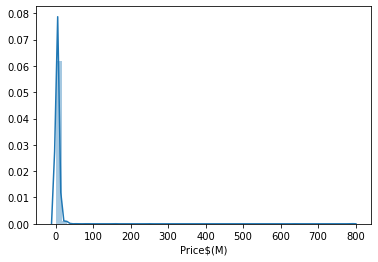

In [6]:
# histogram
sns.distplot(df_train['Price$(M)'])

* Some serious outliers

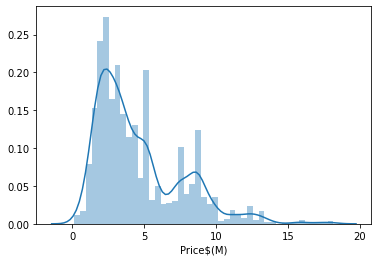

In [7]:
# let's try to limit the range to see the shape better
sns.distplot(df_train[df_train['Price$(M)']< 20]['Price$(M)'])

* Positive skewness
* Multimodel Distribution

### Relationship with numerical variables

In [8]:
def scatter_plot(df, target, var, outlier):
    df = df[df[target]<outlier]
    sns.scatterplot(x=var, y=target, data=df)

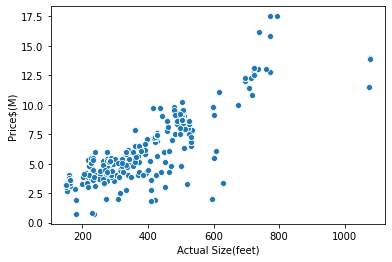

In [26]:
var = 'Actual Size(feet)'
scatter_plot(df_train, 'Price$(M)', var, 2000)

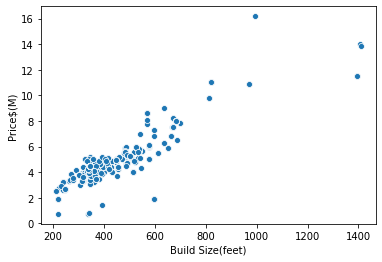

In [27]:
var = 'Build Size(feet)'
scatter_plot(df_train, 'Price$(M)', var, 2000)

* Clearly, linear relationship between area and price

### Relationship with categorical variables

In [45]:
def boxplot(df, target, var, outlier):
    df = df[df[target]<outlier]
    df = df.sort_values(var)
    f, ax = plt.subplots(figsize=(16, 8))
    sns.boxplot(x=var, y=target, data=df)

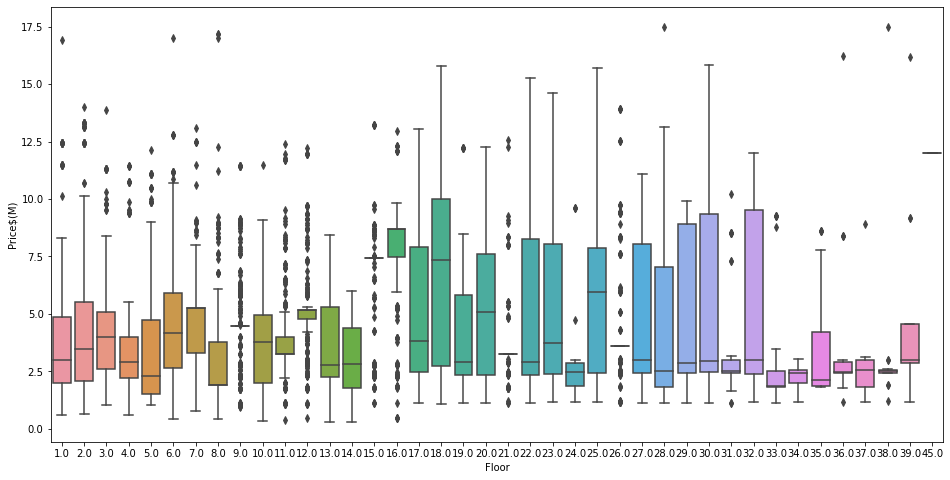

In [46]:
var = 'Floor'
boxplot(df_train, 'Price$(M)', var, 20)

* It seems that middle floors (15-25) are more expensive

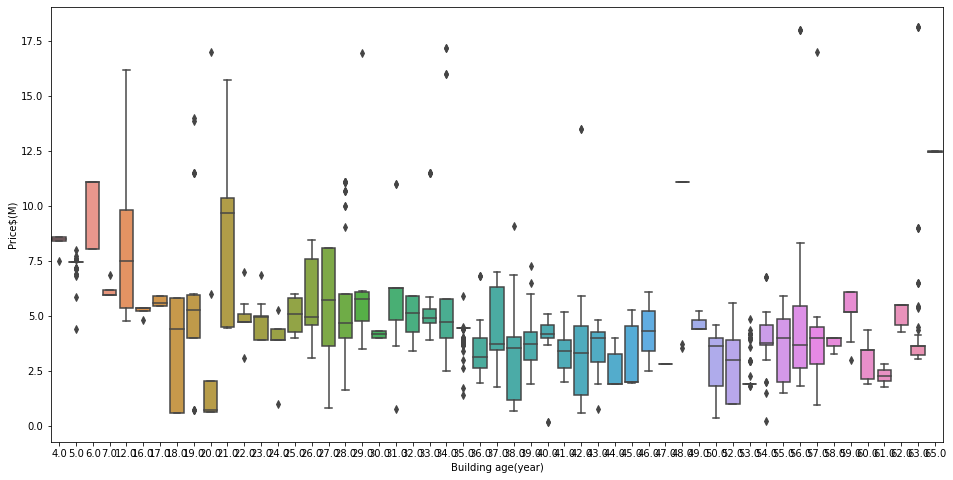

In [48]:
var = 'Building age(year)'
boxplot(df_train, 'Price$(M)', var, 20)

* It is quite obviouse that the older the building, the cheaper it is

## Correlation

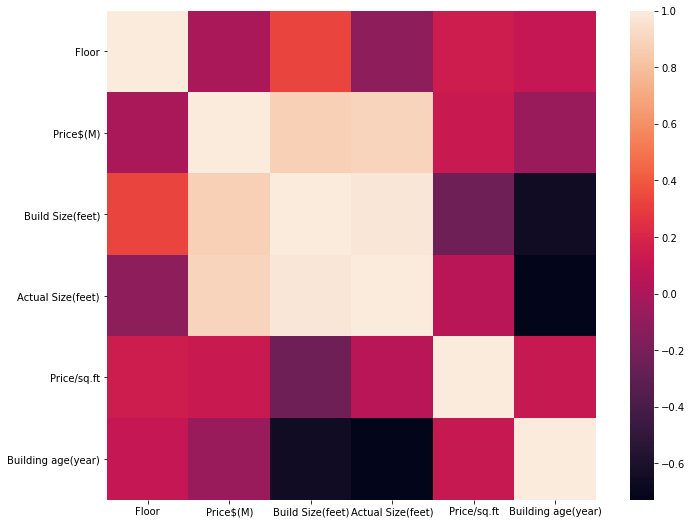

In [53]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True)

* Price$(M) positive correlated with Build Size, actual size, and negatively correlated with age
* Building size and building age is negatively correlated, postively correlated with actual size, and floor

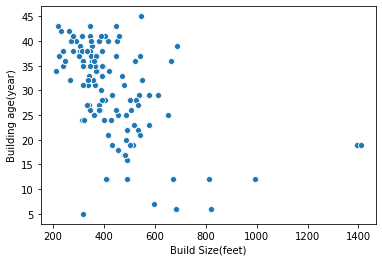

In [54]:
# Building size and building age is interested observation (counter intuitive)
# let's plot it

var = 'Build Size(feet)'
scatter_plot(df_train, 'Building age(year)', var, 2000)

## Scatter Plot

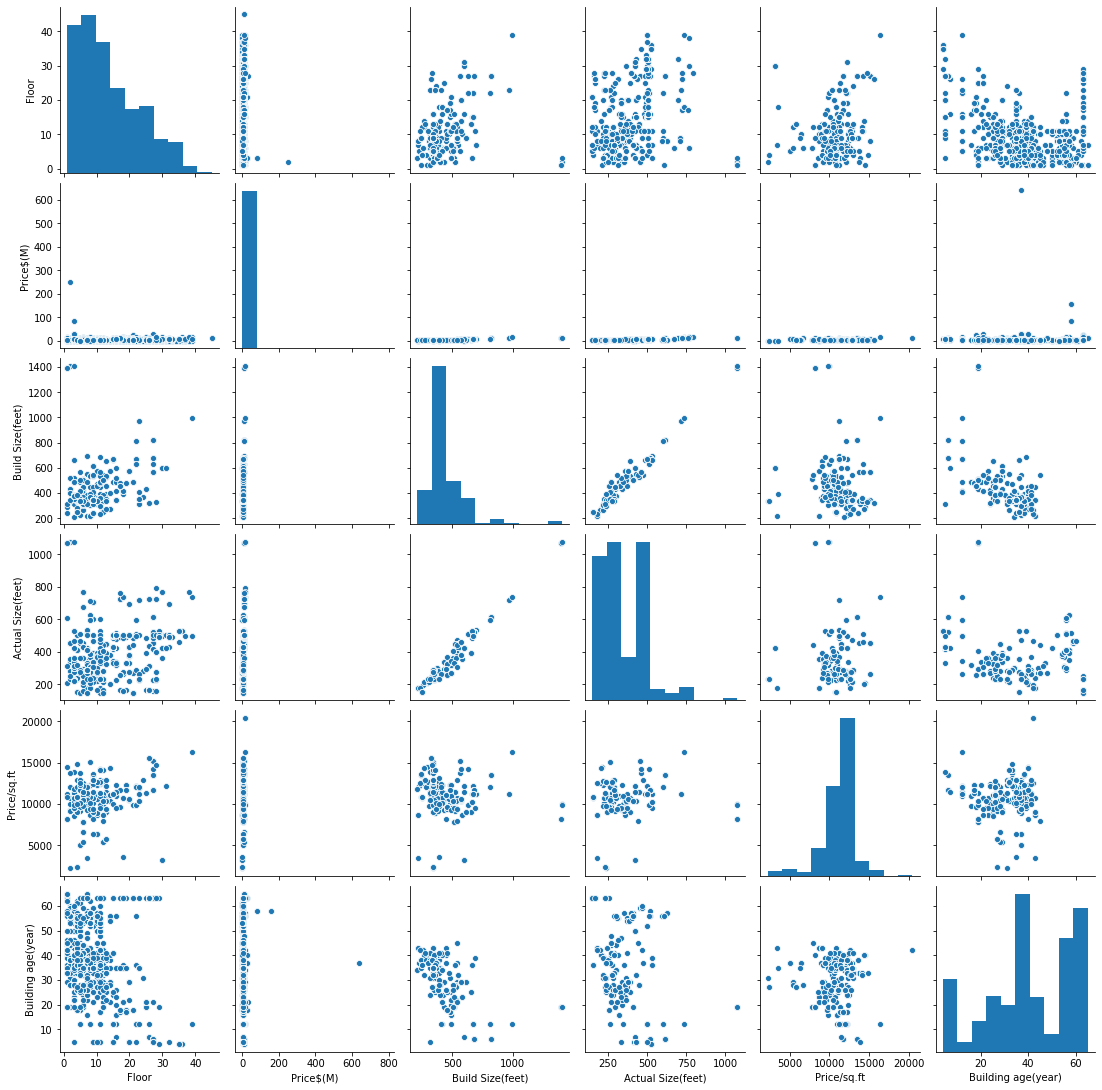

In [55]:
sns.pairplot(df_train)